# Hypothesis Testing (ore)
Name: Mike McCann <br>
Date: 06 MAY 2022

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

# sns.set_context('talk')

## Functions

In [ ]:
def comparison(group, target, data1, data2, name1, name2):
    fig, (axes) = plt.subplots(figsize = (10, 5), ncols=2, 
                                    constrained_layout=True,
                                    gridspec_kw={'width_ratios':[0.8,0.2]})

    sns.histplot(data = df, x = 'charges', hue = group, kde = True,
                stat = 'density', common_norm = False, ax = axes[0])

    axes[0].axvline(np.mean(data1), ls='--',lw=3, label=f"{name1} (Mean={np.mean(data1):.2f})")

    axes[0].axvline(np.mean(data2), ls='--', lw=3, label=f"{name2} (Mean={np.mean(data2):.2f})", color = 'orange')

    axes[0].legend(prop={"size":14}, loc='upper right')


    sns.barplot(data = df, x = group, y = target, ax = axes[1])

    fig.suptitle(f'Comparison of {name1} and {name2}',fontsize='xx-large');

## Read and Check Data

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv'
df = pd.read_csv(url)

In [ ]:
display(df.head())
print('\n')
df.info(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1. Do smokers have higher insurance charges than non-smokers?


## Hypotheses
- Null Hypothesis ($H_0$): Smokers have the same insurance charges as non-smokers (they are the same/equal).
- Alternate Hypothesis ($H_1$): Smokers have higher insurance charges than non-smokers.
- Alpha: 0.05

## Test Type and Assumptions
We have two groups (smokers and non-smokers) and are looking at numeric data (charges). We will therefore use a 2 Sample T-Test. 

The assumptions for a 2 Sample T-Test are as follows:
- No significant outliers
- Equal variance
- Normality

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
smoke = df.loc[df['smoker'] == 'yes'].copy()
nosmoke = df.loc[df['smoker'] == 'no'].copy()

smoke_charges = smoke['charges']
nosmoke_charges = nosmoke['charges']

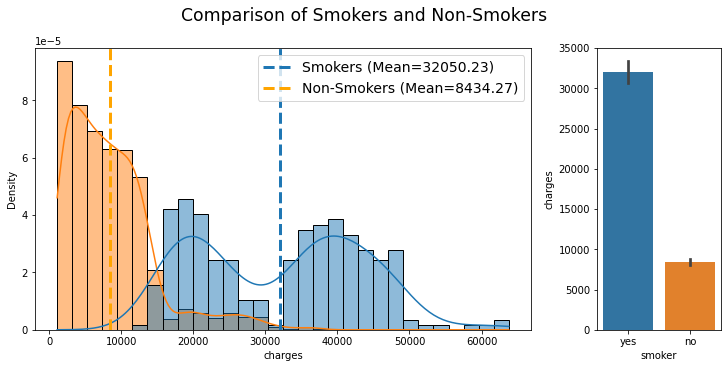

In [ ]:
comparison('smoker', 'charges', smoke_charges, nosmoke_charges, 'Smokers', 'Non-Smokers')

### Check for Outliers

In [ ]:
# Outliers in smoking group
zscores = stats.zscore(smoke_charges)
outliers = abs(zscores) > 3
np.sum(outliers)

0

In [ ]:
# Outliers in non-smoking group
zscores = stats.zscore(nosmoke_charges)
outliers = abs(zscores) > 3
np.sum(outliers)

24

There are no outliers in the smoking group, but 24 outliers in the non-smoking group. There are over 1000 datapoints in the non-smoking group so we can safely get rid of the outliers in this case.

In [ ]:
nosmoke_charges = nosmoke_charges.loc[~outliers]

### Check for Equal Variance

In [ ]:
result = stats.levene(smoke_charges, nosmoke_charges)
result
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


The groups do NOT have equal variance which means we will need to use equal_var = False

### Check for Normality
Technically both samples are > 15 so they automatically pass the normality check...

In [ ]:
result = stats.normaltest(smoke_charges)
result.pvalue
if result.pvalue < .05:
    print(f"The distribution is NOT normal.")
else:
    print(f"The distribution IS normal.")

The distribution is NOT normal.


In [ ]:
result = stats.normaltest(nosmoke_charges)
result.pvalue
if result.pvalue < .05:
    print(f"The distribution is NOT normal.")
else:
    print(f"The distribution IS normal.")

The distribution is NOT normal.


Neither group has a normal distribution but as stated earlier the size of the sample makes it so we can ignore normality based on the central limit theorem.

## 2 Sample T-Test

In [ ]:
result = stats.ttest_ind(smoke_charges, nosmoke_charges, equal_var=False)
print(result)
print('\n')
if result.pvalue < .05:
    print(f"We reject the null hypothesis. The difference is statistically signficiant.")
else:
    print(f"We Fail to reject the null hypothesis.")

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


We reject the null hypothesis. The difference is statistically signficiant.


## Results
Our P value is significantly smaller than 0.05 so we can safely reject the null hypothesis. Smokers have higher insurance chargers than non-smokers (see bar chart above for graphical interpretation of charges).

# Q2. Are men more likely to smoke than women?


## Hypotheses
- Null Hypothesis ($H_0$): Men and women are equally likely to smoke (there is no difference based on gender)?
- Alternate Hypothesis ($H_1$): There is a difference between gender and liklihood of smoking. ** 
- Alpha: 0.05

** I would guess that if there is a difference that men would be more likely to smoke but we will investigate this further IF there proves to be a statistically signficant difference.

## Test Type and Assumptions

We have two groups (men and women) and are looking at categorical data (smoker = T/F). We will therefore use a Chi-Squared test. 

The assumptions for a 2 Sample T-Test are as follows:
- There are two categorical variables
- Outcomes are independent

### Categorical Variables
Gender is a categorical variable
as is Smoking (yes/no)

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

nearly identical numbers of males/females in our sample.

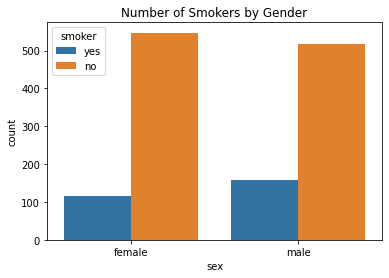

In [ ]:
# The below plot demonstrates these are categorical
ax = sns.countplot(data = df, x = 'sex', hue = 'smoker')
ax.set_title("Number of Smokers by Gender");

### Outcomes Independent
Yes... not sure how to prove this...

## Chi-Squared Test

In [ ]:
# Create a contingency table
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [ ]:
# Run the Chi-Squared Test
results = stats.chi2_contingency(table)
chi2, pvalue, deg_free, expected_vals = result 

print(f'P-vlue = {pvalue} \n')

if pvalue < .05:
    print(f"We reject the null hypothesis. The difference is statistically signficiant.")
else:
    print(f"We Fail to reject the null hypothesis.")

P-vlue = 0.006548143503580696 

We reject the null hypothesis. The difference is statistically signficiant.


## Results
Our p-value of .006 is smaller than .05 so we can reject the null hypothesis and state that there is a difference between men and women when it comes to liklihood of smoking. Further testing (conducted below) indicates that men are more likely than women to smoke. 

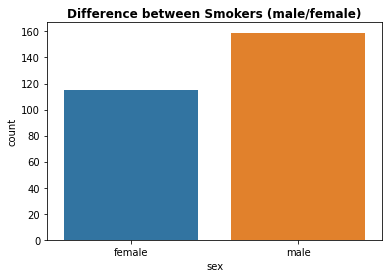

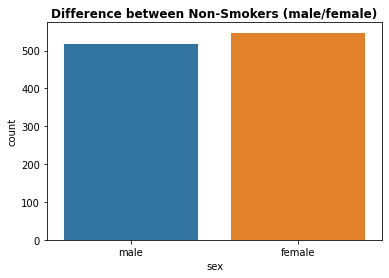

In [ ]:
sns.countplot(data = smoke, x='sex')
plt.title("Difference between Smokers (male/female)", weight = 'semibold')
plt.show();

sns.countplot(data = nosmoke, x='sex')
plt.title("Difference between Non-Smokers (male/female)", weight = 'semibold');

# Q3. Do different regions have different charges, on average?

In [ ]:
### What are the regions in question
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

looks like we have four distinct geographic regions which are fairly evenly distributed.

## Hypotheses
- Null Hypothesis ($H_0$): All regions have the same charges on average.
- Alternate Hypothesis ($H_1$): There is a difference between the average charges based on region.
- Alpha: 0.05

## Test Type and Assumptions
We have four groups (southeast, southwest, northwest, northeast) and are looking at numeric data (charges). We will therefore use an ANOVA test with a Tukey test post-hoc.

The assumptions for a ANOVA are as follows:
- No significant outliers
- Equal variance
- Normality

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


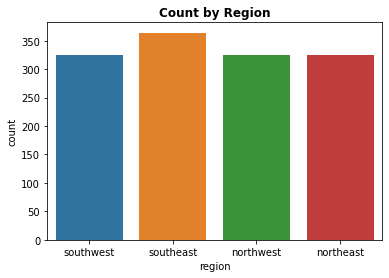

In [ ]:
# Lets take a look at the distribution
ax = sns.countplot(df['region'])
plt.title('Count by Region', weight = 'semibold');

In [ ]:
# Create a dictionary of groups
groups = {}

for region in df['region'].unique():
    temp = df.loc[df['region'] == region, 'charges']
    groups[region] = temp

print(groups.keys(),'\n')

groups['southwest']

dict_keys(['southwest', 'southeast', 'northwest', 'northeast']) 



0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

### Check for Outliers

In [ ]:
for region, data in groups.items():
    outliers = np.abs(stats.zscore(data)) >3
    print(f"There were {outliers.sum()} outliers in the {region} region")

    data = data.loc[~outliers]
    groups[region] = data

There were 8 outliers in the southwest region
There were 2 outliers in the southeast region
There were 7 outliers in the northwest region
There were 4 outliers in the northeast region


### Check for Equal Variance

In [ ]:
results = stats.levene(*groups.values())
print(results, '\n')
if results.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06) 

The groups do NOT have equal variance.


We do not meet the assumption of equal variance which means we will have to run a nonparametric test. In this case we will use the Kruskal-Wallis test instead of ANOVA.

### Check for Normality


In [ ]:
norm_results = {}
for i, data in groups.items():
    stat,p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                       'p':p,
                       'test stat':stat}

norm_results_df = pd.DataFrame(norm_results).T
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


Our data fails to meet the assumption of normalization. HOWEVER we have a large enough sample for each region that it does not matter.

## Kruskal Wallis Test
based on the assumptions tests we have to do the nonparametric version of the ANOVA test...

In [ ]:
results = stats.kruskal(*groups.values())
print(results, '\n')

if result.pvalue < .05:
    print(f"We reject the null hypothesis. The difference is statistically signficiant.")
else:
    print(f"We Fail to reject the null hypothesis.")

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242) 

We Fail to reject the null hypothesis.


## Results
Our pvalue is greater than 0.05 so we fail to reject the null hypothesis. For now we cannot say that there is a difference between region when it comes to average insurance charges.

Text(0.5, 1.0, 'Average Charge by Region')

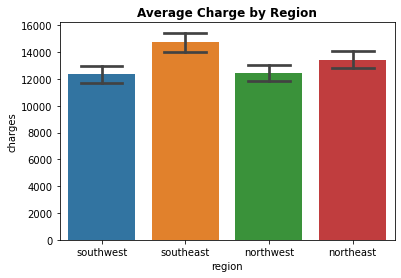

In [ ]:
ax = sns.barplot(data = df, x='region', y = 'charges',
                 ci = 68, capsize = .5)
plt.title('Average Charge by Region', weight = 'semibold')